In [46]:
import numpy as np
import scipy as scp
from scipy.io import loadmat
import sklearn.preprocessing
import matplotlib.pyplot as plt
import pandas as pd

explo = loadmat('data.mat')

In [45]:
# Preprocessing
Xraw = np.array(explo.get('X'))
Xtest = np.array(explo.get('X_test'))
yraw = np.array(explo.get('y'))
wine = np.array(np.concatenate((Xraw, yraw), axis=1))
np.random.shuffle(wine)

trainX = wine[:, :(wine.shape[1] - 1)]
trainY = wine[:, (wine.shape[1] - 1)]
trainX = np.insert(trainX, 12, np.ones(6000), axis = 1)
trainX = sklearn.preprocessing.normalize(trainX)
Xtest = np.insert(Xtest, 12, np.ones(497), axis = 1)
sklearn.preprocessing.normalize(Xtest)




array([[ 0.05008141,  0.00134365,  0.00299267, ...,  0.06473938,
         0.00366449,  0.00610749],
       [ 0.16169519,  0.02215823,  0.00269492, ...,  0.34734522,
         0.01796613,  0.02994355],
       [ 0.04118439,  0.00179063,  0.00125344, ...,  0.05371877,
         0.00298438,  0.00596875],
       ..., 
       [ 0.04589628,  0.00203983,  0.00247694, ...,  0.08815   ,
         0.00437107,  0.00728512],
       [ 0.04868634,  0.00187255,  0.00461896, ...,  0.07989552,
         0.0037451 ,  0.00624184],
       [ 0.02900476,  0.00136493,  0.00076777, ...,  0.03796212,
         0.0021327 ,  0.00426541]])

In [6]:
# computes sigmoid function
def sigmoid(lam):
    return 1/(1+np.log(-lam))

def logreg(X, w):
    return scp.special.expit(X.dot(w))

def L(p, y):
    if p.any() == 0:
        p += 0.000001
    if p.any() == 1:
        p -= 0.000001
    return (-y * np.log(p)) - ((1 - y) * np.log(1 - p))

def J(X, w, y, lam):
    return (np.sum(L(logreg(X, w), y))) + (lam * np.power(np.linalg.norm(w, 2), 2))

def batch_grad(X, w, y, lam):
    return (2 * lam * w) - X.T.dot(y - logreg(X, w))

def stochastic_grad(Xi, w, yi, lam):
    return (2 * lam * w) - Xi.dot(yi - logreg(Xi, w))

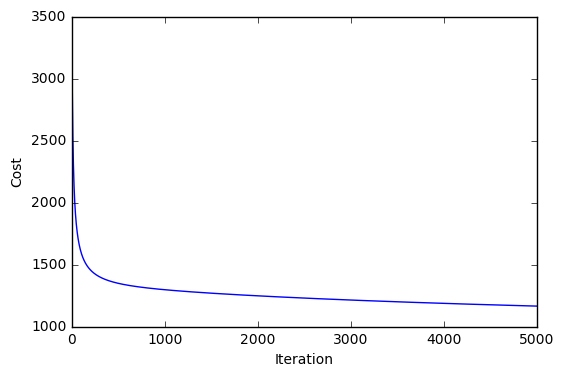

In [16]:
# 4.1: Batch Gradient Descent
w = np.zeros(13)
cost = []
epsilon = 0.001
lam = 0.00001
for i in range(5000):
    update = epsilon * batch_grad(trainX, w, trainY, lam)
    w = w - update
    cost.append(J(trainX, w, trainY, lam))
    
plt.plot(cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()


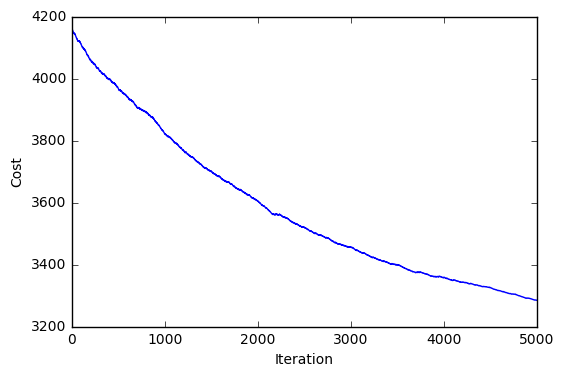

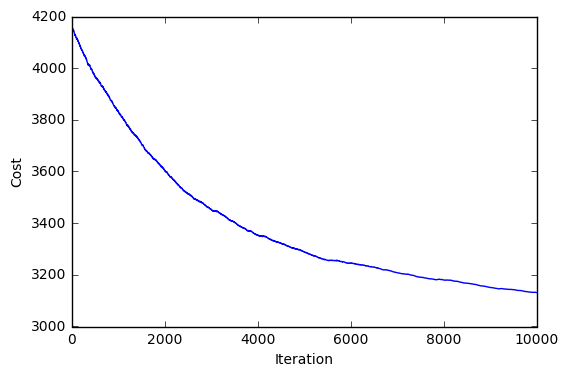

In [17]:
# 4.2 Stochastic Gradient Descent
w = np.zeros(13)
cost = []
epsilon = 0.001
lam = 0.001
for i in range(5000):
    index = np.random.randint(len(trainX))
    xi = trainX[index]
    yi = trainY[index]
    update = epsilon * stochastic_grad(xi, w, yi, lam)
    w = w - update
    cost.append(J(trainX, w, trainY, lam))
    
plt.plot(cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# Not enough iterations, lets do 10000
cost = []
w = np.zeros(13)
for i in range(10000):
    index = np.random.randint(len(trainX) - 1)
    xi = trainX[index]
    yi = trainY[index]
    update = epsilon * stochastic_grad(xi, w, yi, lam)
    w = w - update
    cost.append(J(trainX, w, trainY, lam))
    
plt.plot(cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

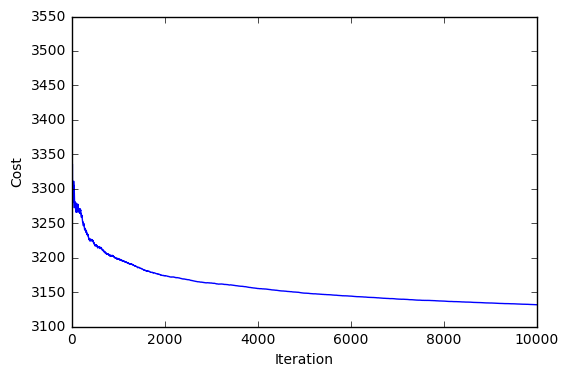

In [18]:
# 4.3 learning rate decreases proportional to 1/t
cost = []
w = np.zeros(13)
for i in range(10000):
    index = np.random.randint(len(trainX) - 1)
    xi = trainX[index]
    yi = trainY[index]
    epsilon = 1/(i+1)
    update = epsilon * stochastic_grad(xi, w, yi, lam)
    w = w - update
    cost.append(J(trainX, w, trainY, lam))
    
plt.plot(cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()


In [38]:
# 4.4  Classification
# First, cross-validation to find best lambda

lam = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
cv_error = []
cv_trainX = trainX[:5000, :]
cv_validX = trainX[5001:, :]
cv_trainY = trainY[:5000]
cv_validY = trainY[5001:]
epsilon = 0.001


for i in range(7):
    w = np.zeros(13)
    for j in range(10000):
        update = epsilon * batch_grad(cv_trainX, w, cv_trainY, lam[i])
        w = w - update
    guess = logreg(cv_validX, w)
    guess[guess < 0.5] = 0
    guess[guess >= 0.5] = 1
    cv_error.append(np.count_nonzero(guess == cv_validY) / 999)
    
#10000 iterations, at epsilon = 0.001 and lamda = 0.001, seems best



In [39]:
cv_error

[0.928928928928929,
 0.9369369369369369,
 0.9379379379379379,
 0.9379379379379379,
 0.9379379379379379,
 0.9379379379379379,
 0.9379379379379379]

In [48]:

w = np.zeros(13)
epsilon = 0.001
lam = 0.001
for i in range(10000):
    update = epsilon * batch_grad(trainX, w, trainY, lam)
    w = w - update
pred = logreg(Xtest, w)
pred[pred < 0.5] = 0
pred[pred >= 0.5] = 1

d = {
    "Id": np.arange(0, len(pred)),
    "Category": pred
}
df = pd.DataFrame(data=d)
df.to_csv("wine_predict.csv", index=False)